In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

1.

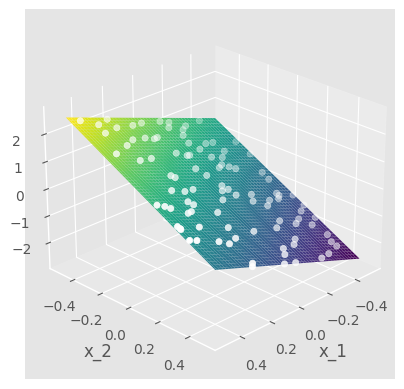

In [11]:
def Y(x_1,x_2):
  return 2.1*x_1 - 3.1*x_2

res = 100

x_1 = np.random.uniform(-0.5,0.5,res)
x_2 = np.random.uniform(-0.5,0.5,res)
Y_plane = np.zeros((res,res))

x_1plane,x_2plane = np.meshgrid(np.linspace(-0.5,0.5,res),np.linspace(-0.5,0.5,res))
for i in range(res):
  for j in range(res):
    Y_plane[j,i] = Y(x_1plane[j,i],x_2plane[j,i])

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d',computed_zorder=False)
ax.plot_surface(x_1plane,x_2plane,Y_plane,cmap="viridis",zorder=1)
ax.scatter(x_1,x_2,Y(x_1,x_2),color="white",zorder=6)
ax.view_init(elev=25, azim=45)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.show()

2.

In [12]:
theta_0 = np.random.uniform(0,1)
theta_1 = np.random.uniform(0,1)
theta_2 = np.random.uniform(0,1)
theta_t = np.array([theta_0,theta_1,theta_2])
print(theta_t)

[0.48151422 0.44607422 0.83627978]


3.

In [13]:
m = res
n = 2

X = np.zeros((n+1,m))
X[0,:] = 1
X[1,:] = x_1
X[2,:] = x_2

4.

In [14]:
h = np.matrix(theta_t)*np.matrix(X)
A = h - Y(x_1,x_2).reshape(1,m)
A_star = np.zeros(A.shape)

for i in range(m):
  A_star[0,i] = A[0,i]*A[0,i]

A = A_star

J = 1/(2*m)*np.sum(A)

5.

In [15]:
delta_J = np.matrix(A)*np.matrix(np.transpose(X))
delta_J = delta_J/m
lr = 0.01
for i in range(10000):
 theta_t = theta_t - lr*delta_J

6.

In [16]:
for i in range(10000):
    h = np.matrix(theta_t)*np.matrix(X)
    A = h - Y(x_1, x_2).reshape(1, m)
    delta_J = np.matrix(A)*np.matrix(np.transpose(X))/m
    theta_t = theta_t - lr*delta_J
    J = (1 / (2*m))*np.sum(np.square(A))
    if J < 1e-6:
        break

print(theta_t)

[[ 5.30042337e-05  2.10384336e+00 -3.10585634e+00]]


7.

In [17]:
class MultilinearRegresion():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    Nfeatures = 2
    m = len(self.X[1,:])
    self.theta = np.random.random(Nfeatures+1).reshape(1,Nfeatures+1)

  def model(self):
    self.h = np.matrix(self.theta)*np.matrix(self.X)

  def costo(self):
    self.A = self.h - self.Y(self.X[1,:], self.X[2,:]).reshape(1, m)
    self.J = (1 / (2*m))*np.sum(np.square(self.A))

  def update_params(self, learning_rate):
    grad = np.matrix(self.A)*np.matrix(np.transpose(self.X))/m
    self.theta = self.theta - learning_rate*grad

  def fit(self, learning_rate):
    for i in range(0, 10000):
      self.model()
      self.costo()
      self.update_params(learning_rate)

In [18]:
Reg = MultilinearRegresion(X, Y)
Reg.fit(0.01)
print(Reg.theta)

[[-1.56997915e-06  2.09966494e+00 -3.09919231e+00]]
